In [352]:
import numpy as np 
import matplotlib.pyplot as plt

# Sur les données de Sysnav 2014

In [353]:
measured_Roll = np.load('Measured_Roll_Pitch_Yow/measured_Roll.npy')
measured_Pitch = np.load('Measured_Roll_Pitch_Yow/measured_Pitch.npy')
measured_Yaw = np.load('Measured_Roll_Pitch_Yow/measured_Yaw.npy')

filtered_Roll = np.load('Measured_Roll_Pitch_Yow/filtered_Roll.npy')
filtered_Pitch = np.load('Measured_Roll_Pitch_Yow/filtered_Pitch.npy')
filtered_Yaw = np.load('Measured_Roll_Pitch_Yow/filtered_Yaw.npy')

gyro_bias=np.load('Measured_Roll_Pitch_Yow/gyro_bias.npy')

time=np.load('Measured_Roll_Pitch_Yow/time.npy')


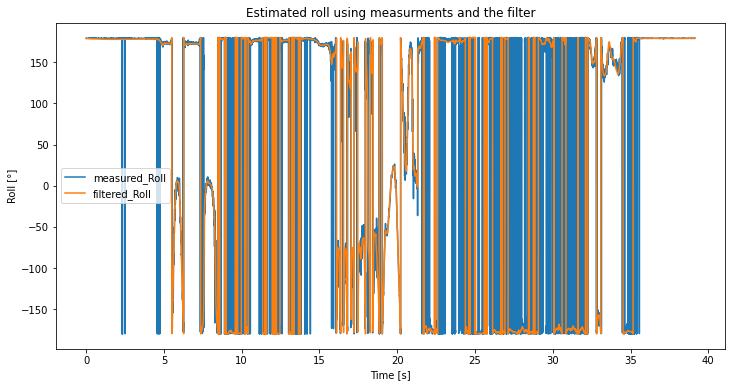

In [354]:
plt.figure(figsize=(12,6),
           facecolor='w')
plt.plot(time,measured_Roll,label='measured_Roll')
plt.plot(time,filtered_Roll, label='filtered_Roll')
plt.xlabel('Time [s]')
plt.ylabel('Roll [°]')
# plt.xlim(0,10)
plt.title("Estimated roll using measurments and the filter")
plt.legend()

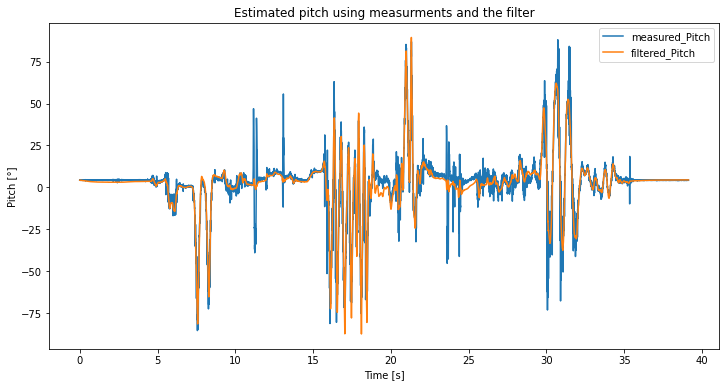

In [355]:
plt.figure(figsize=(12,6),
           facecolor='w')
plt.plot(time,measured_Pitch,label='measured_Pitch')
plt.plot(time,filtered_Pitch,label='filtered_Pitch')
plt.xlabel('Time [s]')
plt.ylabel('Pitch [°]')
# plt.xlim(15,20)
plt.title("Estimated pitch using measurments and the filter")
plt.legend()

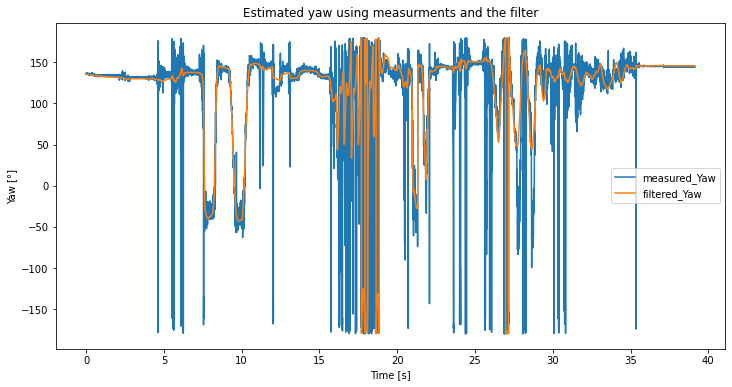

In [356]:
plt.figure(figsize=(12,6),
           facecolor='w')
plt.plot(time,measured_Yaw,label='measured_Yaw')
plt.plot(time,filtered_Yaw,label='filtered_Yaw')
plt.xlabel('Time [s]')
plt.ylabel('Yaw [°]')
# plt.xlim(0,18)
plt.title("Estimated yaw using measurments and the filter")
plt.legend()


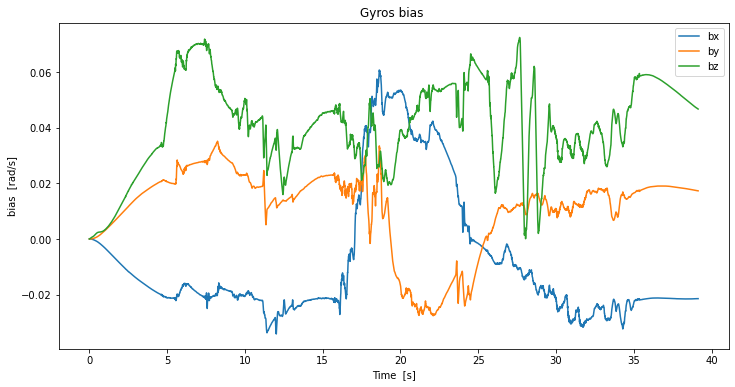

In [357]:
bx=gyro_bias[:,:,0]
by=gyro_bias[:,:,1]
bz=gyro_bias[:,:,2]

plt.figure(figsize=(12,6),
           facecolor='w')
plt.plot(time,bx,label='bx')
plt.plot(time,by,label='by')
plt.plot(time,bz,label='bz')
plt.xlabel('Time  [s]')
plt.ylabel('bias  [rad/s]')
# plt.xlim(0,5)
plt.title('Gyros bias ')
plt.legend()


# Sur les données simulées

In [358]:
real_roll=np.load('Simulated_Roll_Pitch_Yaw/simulated_Roll.npy')
real_pitch=np.load('Simulated_Roll_Pitch_Yaw/simulated_Pitch.npy')
real_yaw=np.load('Simulated_Roll_Pitch_Yaw/simulated_Yaw.npy')

measured_roll=np.load('Simulated_Roll_Pitch_Yaw/measured_Roll.npy')
measured_pitch=np.load('Simulated_Roll_Pitch_Yaw/measured_Pitch.npy')
measured_yaw=np.load('Simulated_Roll_Pitch_Yaw/measured_Yaw.npy')



filtered_Roll = np.load('Simulated_Roll_Pitch_Yaw/filtered_Roll.npy')
filtered_Pitch = np.load('Simulated_Roll_Pitch_Yaw/filtered_Pitch.npy')
filtered_Yaw = np.load('Simulated_Roll_Pitch_Yaw/filtered_Yaw.npy')

gyro_bias_simulated=np.load('Simulated_Roll_Pitch_Yaw/gyro_bias.npy')

time_simulation=np.load('Simulated_Roll_Pitch_Yaw/Time.npy')

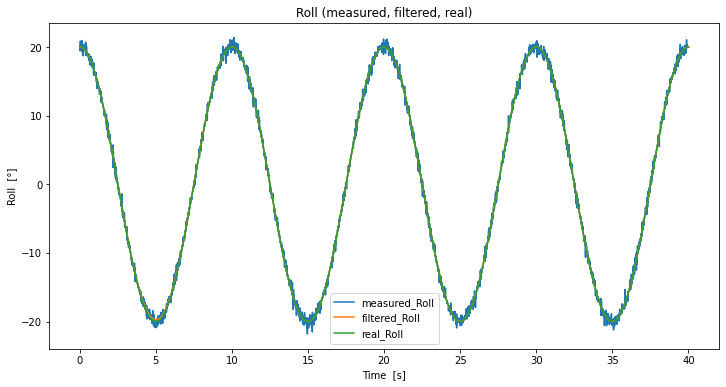

In [359]:
plt.figure(figsize=(12,6),
           facecolor='w')
plt.plot(time_simulation,measured_roll, label='measured_Roll')
plt.plot(time_simulation,filtered_Roll, label='filtered_Roll')
plt.plot(time_simulation,real_roll, label='real_Roll')
plt.xlabel('Time  [s]')
plt.ylabel('Roll  [°]')
plt.title("Roll (measured, filtered, real)")
plt.legend()

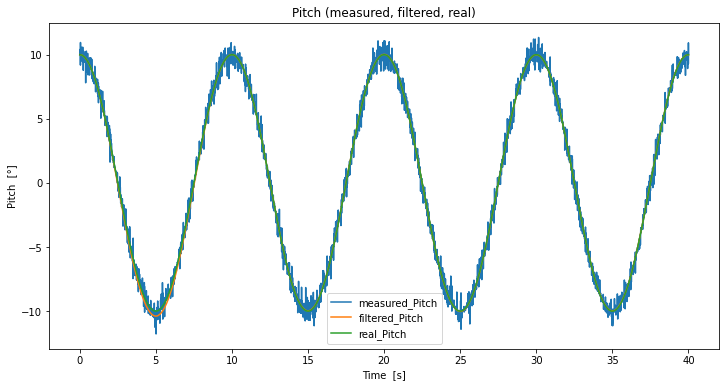

In [360]:
plt.figure(figsize=(12,6),
           facecolor='w')
plt.plot(time_simulation,measured_pitch, label='measured_Pitch')
plt.plot(time_simulation,filtered_Pitch, label='filtered_Pitch')
plt.plot(time_simulation,real_pitch, label='real_Pitch')
plt.xlabel('Time  [s]')
plt.ylabel('Pitch  [°]')
plt.title("Pitch (measured, filtered, real)")
# plt.xlim(20,30)
plt.legend()

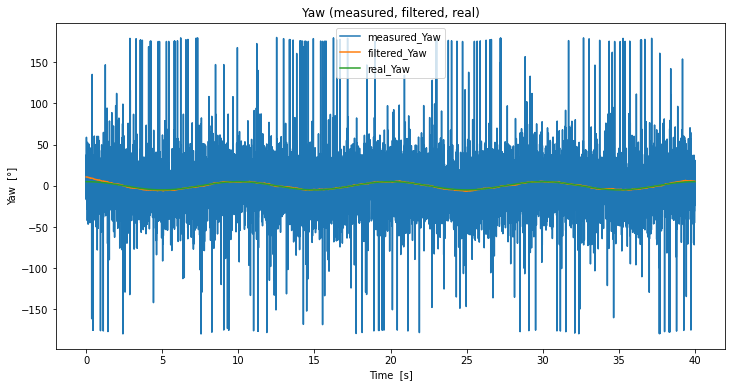

In [361]:
plt.figure(figsize=(12,6),
           facecolor='w')
plt.plot(time_simulation,measured_yaw,label='measured_Yaw')
plt.plot(time_simulation,filtered_Yaw, label='filtered_Yaw')
plt.plot(time_simulation,real_yaw, label='real_Yaw')
# plt.ylim(-10,10)
plt.xlabel('Time  [s]')
plt.ylabel('Yaw  [°]')
plt.title("Yaw (measured, filtered, real)")
plt.legend()

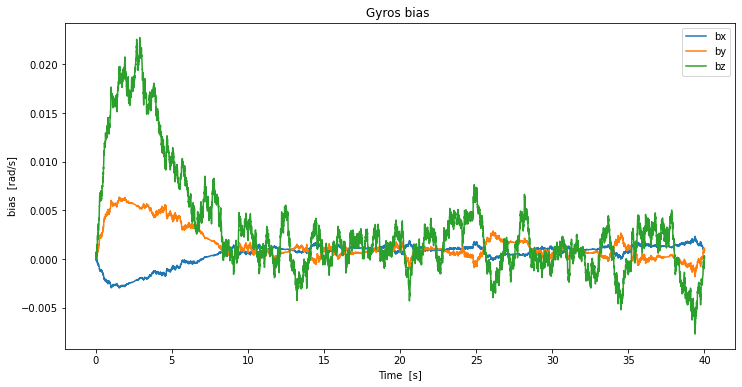

In [362]:

bx=gyro_bias_simulated[:,:,0]
by=gyro_bias_simulated[:,:,1]
bz=gyro_bias_simulated[:,:,2]

plt.figure(figsize=(12,6),
           facecolor='w')
plt.plot(time_simulation,bx,label='bx')
plt.plot(time_simulation,by,label='by')
plt.plot(time_simulation,bz,label='bz')
plt.xlabel('Time  [s]')
plt.ylabel('bias  [rad/s]')
plt.title('Gyros bias ')
plt.legend()

# Vérification des hypothèses  

Text(0.5, 1.0, "Transformation rapide de Fourier de la norme de l'accélération locale (norm_a)")

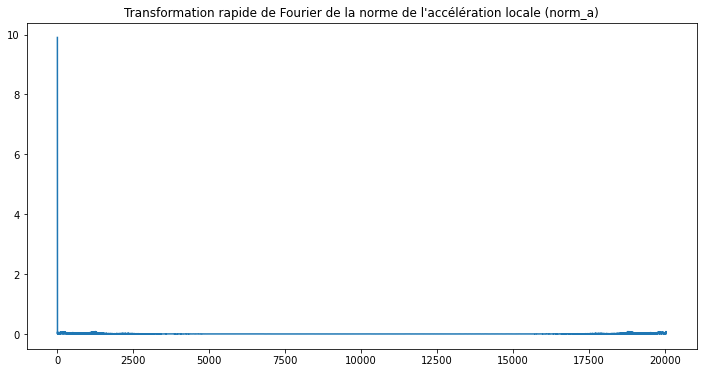

In [363]:

gamma=np.load('Others/gamma.npy')
N=np.shape(gamma)[0]
# contient la norme d'accélération à chaque temps de mesure
norm_a=[np.linalg.norm(gamma[i]) for i in range(N)] 
FFTnorm_a=np.fft.fft(norm_a)/np.size(norm_a)

plt.figure(figsize=(12,6),
           facecolor='w')
plt.plot(np.abs(FFTnorm_a))
plt.title("Transformation rapide de Fourier de la norme de l'accélération locale (norm_a)")


In [364]:
print(np.abs(FFTnorm_a[0])) ## norme de la pesanteur

9.902359594149551


### Hypothèse de basse fréquence  

On voit que la transformée de Fourier obtenue correspond à un dirac, ce qui signifie que la norme de l'accélération mesurée dans le repère local est constante et égale à la norme de la pesanteur. donc l'hypothèse est bien vérifiée. 

### Hypothèse d'orthonormalité du repère local

Le repère de mesure de l'accéléromètre est probablement orthonormé, car la norme de la pesanteur calculée en supposant l'orthonormalité est proche de la valeur attendue.